# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [13]:
# Read data into a dataframe(s).
# Don't forget to call info()!
import pandas as pd

# Load datasets (assuming CSV files as an example)
df1 = pd.read_csv('ad_data.csv')
df2 = pd.read_csv('customer_data.csv')
df = pd.merge(df1, df2, on='customer_id', how='inner')
df["occupation"].nunique()

10

### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

*Note, level 5 work uses at least 3 features to train a K-means model using only the standard Python library and Pandas. A level 4 uses external libraries like scikit or numpy.*

         customer_id  ad_response        age  family_size         income
cluster                                                                 
0        5203.000000     0.900000  36.333333     1.933333  139567.066667
1        5570.423077     0.653846  30.269231     1.384615  107411.000000
2        5737.314286     0.714286  30.114286     1.457143  108107.028571
3        4795.470588     0.117647  34.941176     2.705882  128479.176471
4        5262.625000     0.375000  61.750000     3.250000  250000.000000
5        5125.723077     0.707692  35.600000     1.784615  134477.538462
6        4376.672414     0.534483  34.293103     1.465517  129878.051724
7        5363.894737     0.315789  35.184211     2.289474  128541.394737
8        5698.435484     0.419355  34.983871     1.354839  131703.193548
9        3907.000000     0.000000  49.500000     1.625000  219599.000000
10       4965.516667     0.333333  34.283333     1.500000  127669.550000
11       4670.400000     0.333333  62.466667     3.

C:\Users\phowlett\AppData\Local\Temp\ipykernel_34916\3729056170.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  it_customers['cluster'] = clusters


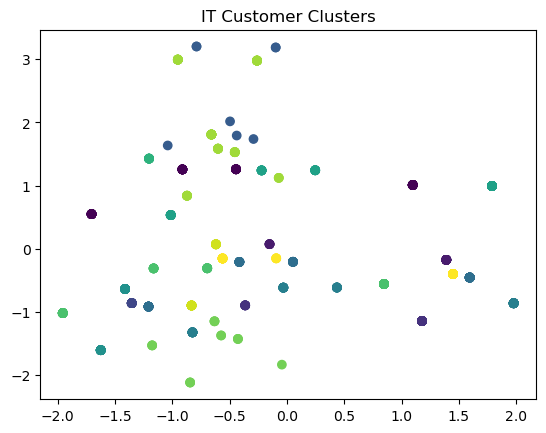

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
it_customers = df[df['occupation'] == 'IT']
features = ['ad_type', 'ad_medium']
clustering_data = it_customers[features]
categorical_columns = ['ad_type', 'ad_medium']
clustering_data = pd.get_dummies(clustering_data, columns=categorical_columns, drop_first=True)
scaler = StandardScaler()
k=15
scaled_data = scaler.fit_transform(clustering_data)
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
it_customers['cluster'] = clusters
# View cluster centroids
centroids = kmeans.cluster_centers_

# Summarize the clusters
cluster_summary = it_customers.groupby('cluster').mean()
print(cluster_summary)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
plt.title('IT Customer Clusters')
plt.show()

#### Don't forget to describe the centers of the clusters you found.

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [2]:
# Test model here.

#### Interpret your elbow plot and/or silhouette score here.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

#### Describe the cluster you are targeting here.

#### Link your ad here.